In [103]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
API_KEY="GO143LK4E3VERLLK"

In [104]:
class ScriptData:
    #Initialize data frame to store various stock data
    def __init__(self):
        self.df_list={}
        pass
    
    #Fetches intraday for given script
    def fetch_intraday_data(self,script):
        ts = TimeSeries(key=API_KEY)
        df, meta_data = ts.get_intraday(symbol=script,interval='60min', outputsize='compact')
        self.df_list[script]=df
        return df
    
    #Converts fetched intraday data
    def convert_intraday_data(self,script):
        df=pd.DataFrame.from_dict(self.df_list[script], orient ='index') 
        df.reset_index(inplace=True)
        df = df.rename(columns = {'index':'timestamp'})
        df = df.rename(columns = {'1. open':'open'})
        df = df.rename(columns = {'2. high':'high'})
        df = df.rename(columns = {'3. low':'low'})
        df = df.rename(columns = {'4. close':'close'})
        df = df.rename(columns = {'5. volume':'volume'})
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df['open'] = df['open'].astype(float)
        df['high'] = df['high'].astype(float)
        df['low'] = df['low'].astype(float)
        df['close'] = df['close'].astype(float)
        df['volume'] = df['volume'].astype(int)
        df=df.loc[::-1].reset_index(drop=True)
        self.df_list[script]=df
        return df
    
    #To return script data
    def __getitem__(self,script):
        return self.df_list[script]
    
    #To check if script in object
    def __contains__(self, script):
        return script in self.df_list

    
    

In [105]:
script_data=ScriptData()
script_data.fetch_intraday_data('GOOGL')
script_data.convert_intraday_data('GOOGL')
script_data['GOOGL']

,timestamp,open,high,low,close,volume
0,2022-12-21 17:00:00,89.5800,89.8000,89.55,89.6200,1596119
1,2022-12-21 18:00:00,89.7100,89.7900,89.66,89.7500,4156
2,2022-12-21 19:00:00,89.7500,89.7900,89.60,89.7700,7033
3,2022-12-21 20:00:00,89.7000,89.7700,89.62,89.7700,8787
4,2022-12-22 05:00:00,89.8600,89.8600,89.70,89.7000,5285
...,...,...,...,...,...,...
95,2022-12-30 16:00:00,87.2050,88.3000,87.20,88.2400,5183569
96,2022-12-30 17:00:00,88.2300,88.7400,88.22,88.5000,1038000
97,2022-12-30 18:00:00,88.4815,88.4815,88.36,88.4199,7066
98,2022-12-30 19:00:00,88.3600,88.4500,88.35,88.4000,13286


In [106]:
script_data.fetch_intraday_data('AAPL')
script_data.convert_intraday_data('AAPL')
script_data['AAPL']

,timestamp,open,high,low,close,volume
0,2022-12-21 17:00:00,135.2790,135.5586,134.6498,135.4188,5399794
1,2022-12-21 18:00:00,135.4088,135.4887,135.3289,135.4887,43032
2,2022-12-21 19:00:00,135.4987,135.5287,135.3888,135.4588,42909
3,2022-12-21 20:00:00,135.4588,135.5586,135.3389,135.4987,40192
4,2022-12-22 05:00:00,135.7783,135.7783,135.2790,135.2790,21403
...,...,...,...,...,...,...
95,2022-12-30 16:00:00,128.2800,129.9500,128.2550,129.9100,16425305
96,2022-12-30 17:00:00,129.9100,130.0500,129.7800,129.9900,2235326
97,2022-12-30 18:00:00,130.0000,130.0500,129.9100,129.9487,76786
98,2022-12-30 19:00:00,129.9500,130.0500,129.9400,130.0100,35882


In [107]:
'GOOGL' in script_data

True

In [108]:
'AAPL' in script_data

True

In [109]:
'NVDA' in script_data

False

In [110]:
def indicator1(df, timeperiod):
    size= len(df.index)
    indicator = [numpy.nan for x in range(timeperiod-1)]
    i = timeperiod
    while i<= size:
        indicator.append((df.iloc[i-timeperiod:i,[4]].sum()/timeperiod)[0])
        i=i+1
    df['indicator1']=indicator
    df = df[['timestamp','indicator1']]
    return df

In [111]:
indicator1(script_data['GOOGL'], 2)

,timestamp,indicator1
0,2022-12-21 17:00:00,NaN
1,2022-12-21 18:00:00,89.68500
2,2022-12-21 19:00:00,89.76000
3,2022-12-21 20:00:00,89.77000
4,2022-12-22 05:00:00,89.73500
...,...,...
95,2022-12-30 16:00:00,87.72250
96,2022-12-30 17:00:00,88.37000
97,2022-12-30 18:00:00,88.45995
98,2022-12-30 19:00:00,88.40995


In [112]:
indicator1(script_data['AAPL'], 2)

,timestamp,indicator1
0,2022-12-21 17:00:00,NaN
1,2022-12-21 18:00:00,135.45375
2,2022-12-21 19:00:00,135.47375
3,2022-12-21 20:00:00,135.47875
4,2022-12-22 05:00:00,135.38885
...,...,...
95,2022-12-30 16:00:00,129.09500
96,2022-12-30 17:00:00,129.95000
97,2022-12-30 18:00:00,129.96935
98,2022-12-30 19:00:00,129.97935


In [113]:
class Strategy:
    
    #Initialize all variables of Strategy class
    def __init__(self, script):
        self.close_data=[]
        self.indicator_data=[]
        self.df=pd.DataFrame()
        self.signals=pd.DataFrame()
        self.script_data=ScriptData()
        self.script=script
        pass
    
    #Get script data by calling convert_intraday_data and indicator1 functions
    def get_script_data(self):
        self.script_data.fetch_intraday_data(self.script)
        self.df=self.script_data.convert_intraday_data(self.script)
        self.df['indicator1']=indicator1(self.script_data[self.script], 5)['indicator1']
        self.close_data=self.df['close']
        self.indicator_data=self.df['indicator1']
        return self.df
    
    # Provide signals based on close and indicator data
    def get_signals(self):
        size= len(self.df.index)
        signal = ["NaN"]
        i = 1
        while i< size:
            #Indicator cuts close downwards
            if(self.close_data[i]>=self.indicator_data[i] and self.close_data[i-1]<=self.indicator_data[i-1]):
                signal.append("SELL")
            #Indicator cuts close upwards
            elif(self.close_data[i]<=self.indicator_data[i] and self.close_data[i-1]>=self.indicator_data[i-1]):
                signal.append("BUY")
            else:
                signal.append("NO SIGNAL")                                
            i=i+1
        self.signals['timestamp']=self.df['timestamp']    
        self.signals['signal']=signal
        return self.signals
    
    #Visualize close and indicator cutting each other
    def plotting(self, lower, upper):
        ax = plt.gca() 
        # line plot for close data
        strategy.df.iloc[lower:upper].plot(kind = 'line', x = 'timestamp', y = 'close', color = 'red',ax = ax)
        # line plot for indicator data
        strategy.df.iloc[lower:upper].plot(kind = 'line',x = 'timestamp', y = 'indicator1', color = 'blue',ax = ax)
        # set the title
        plt.title('Buy / Sell')
        # show the plot
        plt.show()
    
    #CandleStick plot
    def plot_candlestick(self):
        fig = go.Figure()
        fig.add_trace(go.Candlestick(x=self.df['timestamp'],
                open=self.df['open'],
                high=self.df['high'],
                low=self.df['low'],
                close=self.df['close'], name= 'df'))
        fig.add_trace(go.Scatter(x=self.df['timestamp'], y=self.df['indicator1'],mode='lines', name= 'indiactor', line=dict(color="#009900")))
        fig.show()
        

In [114]:
strategy= Strategy('NVDA')
strategy.get_script_data()
strategy.indicator_data

0          NaN
1          NaN
2          NaN
3          NaN
4     164.7960
        ...   
95    144.7953
96    145.1124
97    145.3865
98    145.8245
99    146.2945
Name: indicator1, Length: 100, dtype: float64

In [115]:
df=strategy.get_signals()

In [116]:
# Filters all records with BUY or SELL
df.loc[(df['signal'] == 'BUY')|(df['signal'] == 'SELL')]

,timestamp,signal
14,2022-12-22 15:00:00,SELL
19,2022-12-22 20:00:00,BUY
21,2022-12-23 06:00:00,SELL
24,2022-12-23 09:00:00,BUY
28,2022-12-23 13:00:00,SELL
34,2022-12-23 19:00:00,BUY
36,2022-12-27 05:00:00,SELL
39,2022-12-27 08:00:00,BUY
53,2022-12-28 06:00:00,SELL
56,2022-12-28 09:00:00,BUY


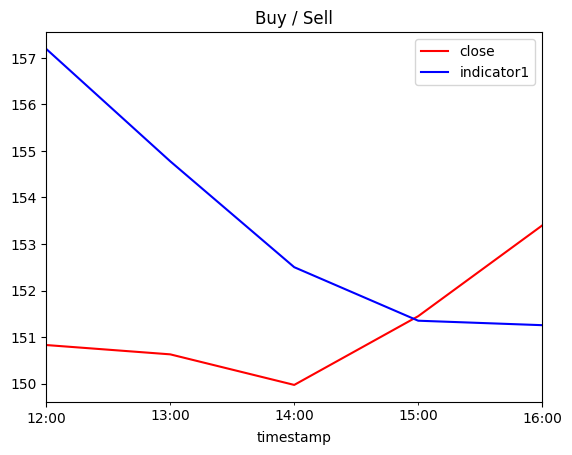

In [117]:
# We can see that the 14th record indicator cuts close from above, hence we sell 
strategy.plotting(11,16)

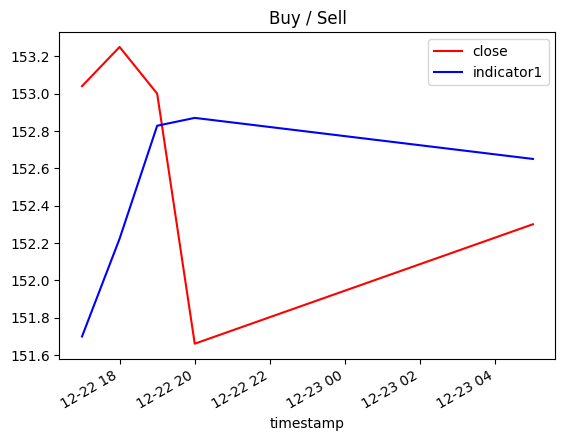

In [118]:
# We can see that the 20th record indicator cuts close from bellow, hence we buy
strategy.plotting(16,21)

In [119]:
strategy.plot_candlestick()